In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
housing = pd.read_csv('housing.csv',header=0,sep=',')#names=[""]    
#housing.tail()
#housing[2:5]
#housing.shape
#housing.head()
#housing.coluumns()
#housing["ocean_proximity"].unique()
#housing.info()
#housing["ocean_proximity"].value_counts()
#housing[housing["ocean_proximity"] == "ISLAND"]
#housing["population"][housing["ocean_proximity"] == "ISLAND"]
#housing[["population","ocean_proximity"]][housing["ocean_proximity"] == "ISLAND"]
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


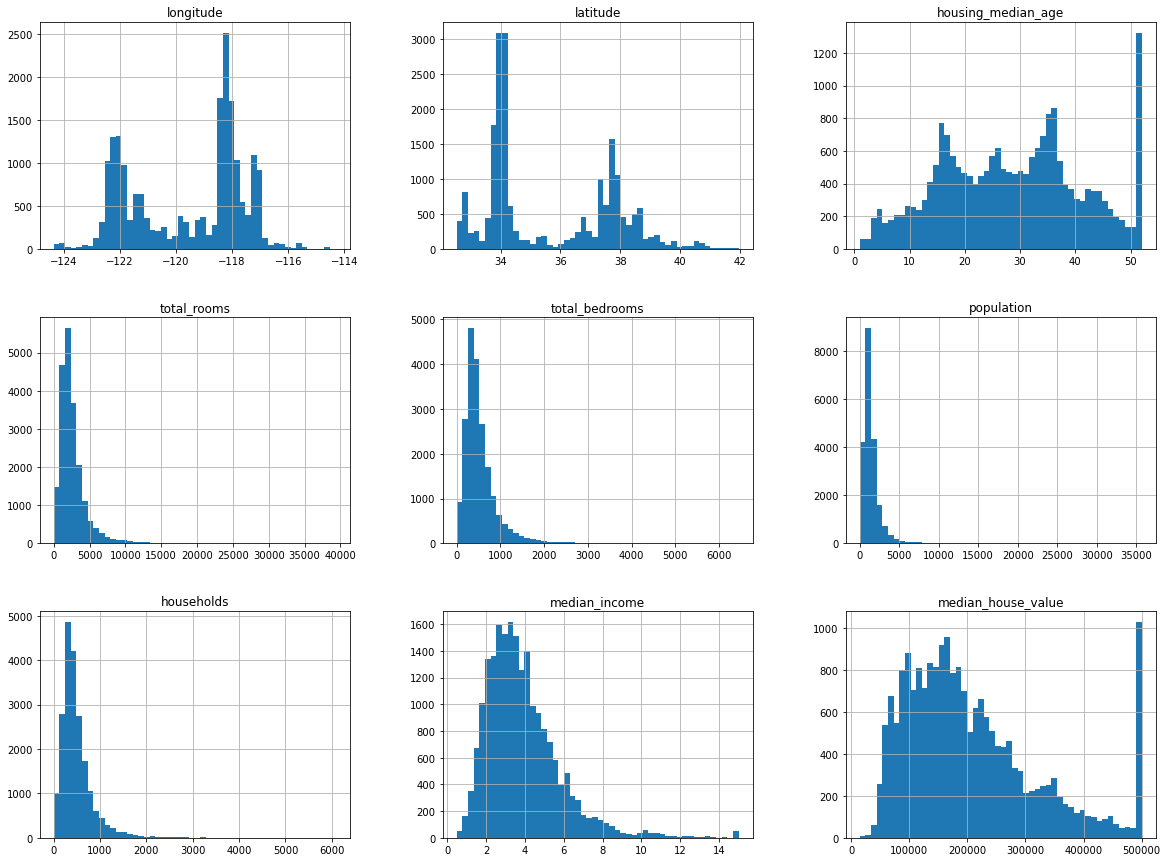

In [3]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [6]:
train_set , test_set = train_test_split(housing,test_size=0.2,random_state = 0)
train_set.shape
train_set.info()
data = train_set.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12069 to 2732
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


(16512, 10)

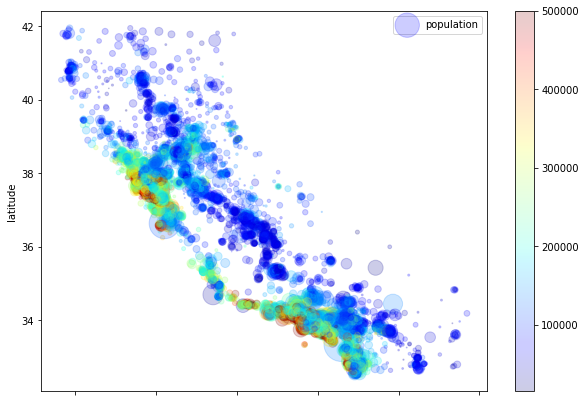

In [5]:
#LESSON THREE
data = train_set.copy()

data.plot(kind="scatter",x="longitude",y="latitude",
          figsize=(10,7),alpha=0.2,
          s=data["population"]/30,label="population",
         c=data["median_house_value"],cmap=plt.get_cmap("jet"))
data.shape

In [8]:
# ضریب استاندارد وابستگی(standard correlation coefficinet)
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.692758
total_rooms           0.133016
housing_median_age    0.106470
households            0.062294
total_bedrooms        0.045394
population           -0.027053
longitude            -0.047277
latitude             -0.142702
Name: median_house_value, dtype: float64

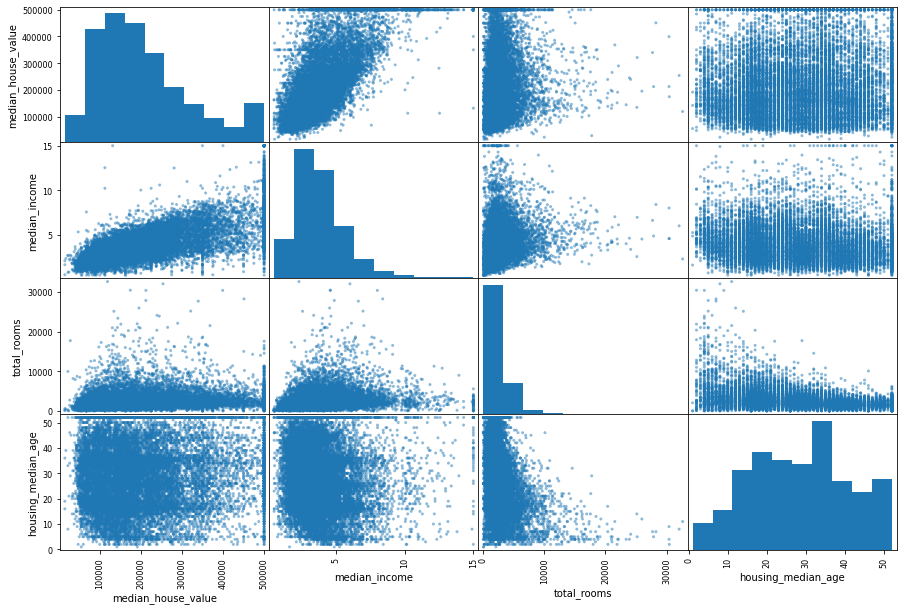

In [13]:
features = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(data[features],figsize=(15,10))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

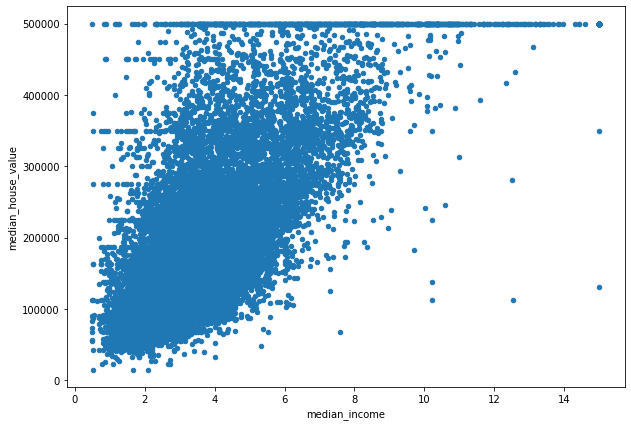

In [8]:
data.plot(kind="scatter",x="median_income",y="median_house_value",
          figsize=(10,7),)

In [14]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,500001.0,INLAND
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,270000.0,NEAR BAY
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,196100.0,<1H OCEAN
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,118800.0,<1H OCEAN
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,225000.0,<1H OCEAN


In [26]:
data["total_median_income_per_housing_median_age"] = data["median_income"]/data["housing_median_age"]
data["total_rooms_per_households"] = data["total_rooms"]/data["households"]
data["total_bedrooms_per_total_rooms"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_households"] = data["population"]/data["households"]

In [28]:
data = data.drop(["housing_median_age_per_total_rooms","housing_median_age_per_total_rooms"],axis=1)

<AxesSubplot:xlabel='median_house_value', ylabel='total_bedrooms_per_total_rooms'>

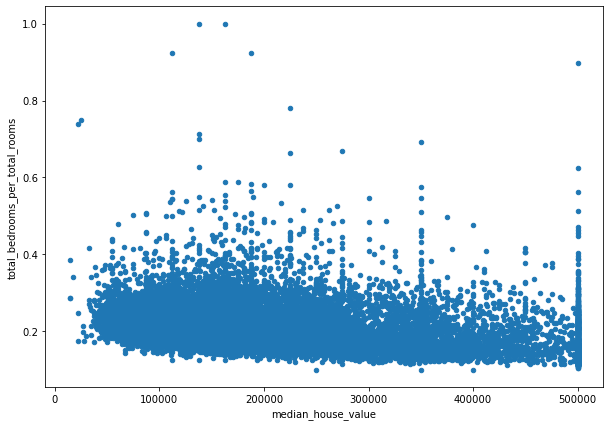

In [29]:
data.plot(kind="scatter",x="median_house_value",y="total_bedrooms_per_total_rooms",
          figsize=(10,7),)

In [30]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value                            1.000000
median_income                                 0.692758
total_median_income_per_housing_median_age    0.207000
total_rooms_per_households                    0.154426
total_rooms                                   0.133016
housing_median_age                            0.106470
households                                    0.062294
total_bedrooms                                0.045394
median_income_per_total_room                  0.039360
population                                   -0.027053
population_per_households                    -0.033169
longitude                                    -0.047277
latitude                                     -0.142702
total_bedrooms_per_total_rooms               -0.264585
Name: median_house_value, dtype: float64

In [35]:
# LESSON FOUR
df = train_set.copy()
df_label = df["median_house_value"].copy()
df = df.drop("median_house_value", axis=1)
df_num = df.drop("ocean_proximity", axis= 1)
#df_num = df_num.dropna(subset=["total_bedrooms"])
#df_num.drop("total_bedrooms",axis=1)

#median =df_num["total_bedrooms"].median
#df_num["total_bedrooms"].fillna(median)

# medain = miad sort mikone adad vasti ro mizare
# mean = miad miangin migire

imputer = SimpleImputer(missing_values=np.nan,strategy="median")
imputer.fit(df_num)
x = imputer.transform(df_num)
df_num_impute_tr = pd.DataFrame(x, columns=df_num.columns)
df_num_impute_tr .info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [36]:
room_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6  # index haye sotoon hayii k lazem darim
class combinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    def transform(self,x,y=None):
        rooms_per_household = x[:,room_ix]/x[:,household_ix]
        population_per_hosuehold = x[:,population_ix]/x[:,household_ix]
        bedrooms_per_room = x[:,bedrooms_ix]/x[:,room_ix]
        return np.c_[x,rooms_per_household,population_per_hosuehold,bedrooms_per_room]
    
custom = combinedAttributesAdder()
data_custom_tr_tmp = custom.transform(df_num_impute_tr.values)
data_custom_tr = pd.DataFrame(data_custom_tr_tmp)
columns = list(df_num_impute_tr.columns)
columns.append("rooms_per_household")
columns.append("population_per_hosuehold")
columns.append("bedrooms_per_room")
data_custom_tr.columns = columns
data_custom_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_hosuehold,bedrooms_per_room
0,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,7.723077,3.507692,0.151394
1,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,5.326622,3.322148,0.206636
2,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,4.668478,2.777174,0.224098
3,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,3.383495,3.635922,0.298422
4,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,4.119792,1.970486,0.253266


In [37]:
# ravesh kam kardan faseeh dar sotoonha
#normalization bayen 0 ta 1 myare

# Srandardization miyad varians hesab mikone
feature_scal = StandardScaler()
data_num_scaled_tr = pd.DataFrame(feature_scal.fit_transform(data_custom_tr.values), columns=data_custom_tr.columns)
data_num_scaled_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_hosuehold,bedrooms_per_room
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-1.131410e-14,7.269702e-16,-2.758076e-16,-9.286150e-17,8.773801e-17,1.285242e-17,1.885335e-17,-1.107399e-16,-7.636818e-17,9.893135e-18,6.932170e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.387300e+00,-1.443857e+00,-2.191882e+00,-1.206378e+00,-1.274083e+00,-1.244447e+00,-1.302982e+00,-1.770783e+00,-1.817613e+00,-3.540548e-01,-2.776074e+00
25%,-1.115601e+00,-7.932566e-01,-8.427417e-01,-5.451461e-01,-5.747789e-01,-5.602992e-01,-5.761304e-01,-6.868704e-01,-3.903412e-01,-9.353952e-02,-6.017132e-01
50%,5.351153e-01,-6.434780e-01,3.023146e-02,-2.346506e-01,-2.441556e-01,-2.269741e-01,-2.349283e-01,-1.719169e-01,-7.861158e-02,-3.300362e-02,-1.634764e-01
75%,7.794811e-01,9.760028e-01,6.651210e-01,2.326931e-01,2.553473e-01,2.612029e-01,2.762212e-01,4.569491e-01,2.482430e-01,3.923607e-02,4.175549e-01
max,2.619705e+00,2.960569e+00,1.855539e+00,1.371250e+01,1.405352e+01,2.997001e+01,1.459625e+01,5.833981e+00,5.408569e+01,9.263630e+01,4.104618e+01


In [38]:
encoder_1hot = OneHotEncoder(sparse=False)
data_cat = df["ocean_proximity"]
data_cat_1hot_tmp =  encoder_1hot.fit_transform(df[["ocean_proximity"]])
data_cat_1hot = pd.DataFrame(data_cat_1hot_tmp,)
data_cat_1hot.columns = encoder_1hot.get_feature_names(["prox"])
data_cat_1hot.head()
final = pd.concat([data_num_scaled_tr,data_cat_1hot],axis=1)
final


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_hosuehold,bedrooms_per_room,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,1.003899,-0.840062,-1.795076,-0.977736,-1.095689,-1.047601,-1.135650,0.190012,0.907714,0.074082,-0.974585,0.0,1.0,0.0,0.0,0.0
1,-1.434772,0.985364,1.855539,-0.118501,-0.106198,0.052109,-0.136882,0.269311,-0.042002,0.045276,-0.104142,0.0,0.0,0.0,1.0,0.0
2,0.779481,-0.840062,-0.207852,-0.421680,-0.360706,-0.352955,-0.343433,0.029895,-0.302824,-0.039332,0.171007,1.0,0.0,0.0,0.0,0.0
3,0.649818,-0.755812,0.744482,-0.888566,-0.781716,-0.591794,-0.766994,-1.264470,-0.812064,0.093990,1.342136,1.0,0.0,0.0,0.0,0.0
4,0.599947,-0.723048,1.855539,-0.122159,0.153068,-0.254095,0.200399,-0.367016,-0.520269,-0.164572,0.630611,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-0.846300,1.238115,-0.684019,-0.606422,-0.731766,-0.624165,-0.733005,0.281216,0.224858,0.034252,-0.614023,0.0,1.0,0.0,0.0,0.0
16508,-0.661778,0.868349,-0.128491,-0.696050,-0.812637,-0.681031,-0.759151,-0.504949,-0.033022,0.010119,-0.611792,0.0,1.0,0.0,0.0,0.0
16509,-1.165471,0.447097,0.188954,-0.552920,-0.244156,-0.631164,-0.278069,-0.355897,-0.709927,-0.192383,1.418756,0.0,0.0,0.0,0.0,1.0
16510,0.814390,-0.938355,0.427037,-0.235565,-0.091926,-0.326709,-0.081976,0.920532,-0.353503,-0.121509,0.332598,1.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.pipeline import FeatureUnion

room_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6  # index haye sotoon hayii k lazem darim
class combinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    def transform(self,x,y=None):
        rooms_per_household = x[:,room_ix]/x[:,household_ix]
        population_per_hosuehold = x[:,population_ix]/x[:,household_ix]
        bedrooms_per_room = x[:,bedrooms_ix]/x[:,room_ix]
        return np.c_[x,rooms_per_household,population_per_hosuehold,bedrooms_per_room]

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

df = train_set.copy()
df_label = df["median_house_value"].copy()
df = df.drop(["median_house_value"], axis=1)
df_num = df.drop(["ocean_proximity"], axis=1)
num_attrs = list(df_num)
cat_attrs = ["ocean_proximity"]
num_pipeline = Pipeline([
    ("selctor", DataFrameSelector(num_attrs)),
    ("imputer", SimpleImputer(missing_values=np.nan, strategy="median")),
    ("attribute_adder", combinedAttributesAdder()),
    ("std_scale", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("selctor", DataFrameSelector(cat_attrs)),
    ("one_hat", OneHotEncoder(sparse=False)),

])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline), 
])

housing_prepared = full_pipeline.fit_transform(df)
cl = list(final)
housing_prepared_df = pd.DataFrame(housing_prepared, columns=["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","rooms_per_household",
"population_per_hosuehold","bedrooms_per_room","prox_<1H OCEAN	","prox_INLAND","prox_ISLAND","prox_NEAR BAY	","prox_NEAR OCEAN",])

housing_prepared_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_hosuehold,bedrooms_per_room,prox_<1H OCEAN\t,prox_INLAND,prox_ISLAND,prox_NEAR BAY\t,prox_NEAR OCEAN
0,1.003899,-0.840062,-1.795076,-0.977736,-1.095689,-1.047601,-1.135650,0.190012,0.907714,0.074082,-0.974585,0.0,1.0,0.0,0.0,0.0
1,-1.434772,0.985364,1.855539,-0.118501,-0.106198,0.052109,-0.136882,0.269311,-0.042002,0.045276,-0.104142,0.0,0.0,0.0,1.0,0.0
2,0.779481,-0.840062,-0.207852,-0.421680,-0.360706,-0.352955,-0.343433,0.029895,-0.302824,-0.039332,0.171007,1.0,0.0,0.0,0.0,0.0
3,0.649818,-0.755812,0.744482,-0.888566,-0.781716,-0.591794,-0.766994,-1.264470,-0.812064,0.093990,1.342136,1.0,0.0,0.0,0.0,0.0
4,0.599947,-0.723048,1.855539,-0.122159,0.153068,-0.254095,0.200399,-0.367016,-0.520269,-0.164572,0.630611,1.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # miad amoozesh khaty mide
lin_reg.fit(housing_prepared_df,df_label) #miad mige ba estefade az in amoozesh bebin
sample_data_prepared = housing_prepared_df.iloc[:4] # mige 4 satr aval ro joda kon va bebin ba amoozeshet sazgar hast ya na
print("Prediction:\t", lin_reg.predict(sample_data_prepared))

sample_labels = df_label.iloc[:4] 
print("Lavel:\t\t", list(sample_labels))

Prediction:	 [151097.03591122 273442.53120163 220317.67746605 136097.64525697]
Lavel:		 [500001.0, 270000.0, 196100.0, 118800.0]


In [43]:
from sklearn.metrics import mean_squared_error

# RMSE => miad tavan 2 miangine ekhtelaf ro hesab mikoneh 

housing_predictions = lin_reg.predict(housing_prepared_df)
lin_mse = mean_squared_error(df_label,housing_predictions)
lin_rmse = np.sqrt(lin_mse) # radical migireh
lin_rmse

68279.53619237088

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared_df,df_label)
housing_predictions = tree_reg.predict(housing_prepared_df)
tree_mse = mean_squared_error(df_label,housing_predictions)
tree_rmse = np.sqrt(tree_mse)

tree_rmse

0.0

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared_df,df_label,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display(scor,model_name):
    print("======",model_name,"=======")
    print("scores", scor)
    print("mean", scor.mean())
    print("std_deviation", scor.std())
    print("scores_min",min(scor))

display(tree_rmse_scores,"Decision tree reg")

====== Decision tree reg =======
scores [75626.24472338 71887.05801785 68264.5553708  72420.36880165
 75813.22887841 69254.6687092  66446.57947342 72590.03932283
 69207.19516632 69394.47176113]
mean 71090.44102249866
std_deviation 2947.446495229371
scores_min 66446.57947341715


In [52]:
housing_prepared_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_hosuehold,bedrooms_per_room,prox_<1H OCEAN\t,prox_INLAND,prox_ISLAND,prox_NEAR BAY\t,prox_NEAR OCEAN
0,1.003899,-0.840062,-1.795076,-0.977736,-1.095689,-1.047601,-1.135650,0.190012,0.907714,0.074082,-0.974585,0.0,1.0,0.0,0.0,0.0
1,-1.434772,0.985364,1.855539,-0.118501,-0.106198,0.052109,-0.136882,0.269311,-0.042002,0.045276,-0.104142,0.0,0.0,0.0,1.0,0.0
2,0.779481,-0.840062,-0.207852,-0.421680,-0.360706,-0.352955,-0.343433,0.029895,-0.302824,-0.039332,0.171007,1.0,0.0,0.0,0.0,0.0
3,0.649818,-0.755812,0.744482,-0.888566,-0.781716,-0.591794,-0.766994,-1.264470,-0.812064,0.093990,1.342136,1.0,0.0,0.0,0.0,0.0
4,0.599947,-0.723048,1.855539,-0.122159,0.153068,-0.254095,0.200399,-0.367016,-0.520269,-0.164572,0.630611,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-0.846300,1.238115,-0.684019,-0.606422,-0.731766,-0.624165,-0.733005,0.281216,0.224858,0.034252,-0.614023,0.0,1.0,0.0,0.0,0.0
16508,-0.661778,0.868349,-0.128491,-0.696050,-0.812637,-0.681031,-0.759151,-0.504949,-0.033022,0.010119,-0.611792,0.0,1.0,0.0,0.0,0.0
16509,-1.165471,0.447097,0.188954,-0.552920,-0.244156,-0.631164,-0.278069,-0.355897,-0.709927,-0.192383,1.418756,0.0,0.0,0.0,0.0,1.0
16510,0.814390,-0.938355,0.427037,-0.235565,-0.091926,-0.326709,-0.081976,0.920532,-0.353503,-0.121509,0.332598,1.0,0.0,0.0,0.0,0.0


In [47]:
linea_scores =  cross_val_score(lin_reg,housing_prepared_df,df_label,scoring="neg_mean_squared_error",cv=10)
linear_rmse_scores = np.sqrt(-linea_scores)
display(linear_rmse_scores,"Linear reg")


====== Linear reg =======
scores [72551.13489915 65470.26732566 69218.57707083 67221.93577606
 72720.23044347 67586.49188073 66960.41244498 67824.87405859
 72530.55197441 64836.83638848]
mean 68692.13122623527
std_deviation 2801.90497617158


In [48]:
from sklearn.ensemble import RandomForestRegressor
forest_reg  = RandomForestRegressor()
forest_reg.fit(housing_prepared_df,df_label)
forest_scores = cross_val_score(forest_reg,housing_prepared_df,df_label,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display(forest_rmse_scores,"Random forest reg")

====== Random forest reg =======
scores [53298.32822471 50134.84260564 49975.74162918 49029.65560973
 53622.86148322 50277.3858967  48528.69617539 49855.48823617
 51744.07095792 46168.47919912]
mean 50263.555001776615
std_deviation 2103.6805349495867
